SALES DATA


This dataset contains sales transactions with details about the customer, product, and financials. It includes information such as invoice ID, branch, product line, quantity, and total sales. The dataset also tracks customer demographics (e.g., gender, type) and financial metrics like gross income and margin. It can be used to analyze sales performance, customer preferences, and profitability.

IMPORT LIBARIES AND LOADING DATA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
d=pd.read_csv(r"C:\Data Science\data_set/Sales.csv")
print(d.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

ANALYSIS AND CLEANING

FIND AND REPLACE NULL

In [2]:

print(d.isna().sum())
d.fillna(0,inplace=True)



Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


KNOW THE DATATYPES

In [3]:
d.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

CHANGE THE DATA TYPE AND PRINT INFORMATION OF DATA

In [4]:

d['Date']=pd.to_datetime(d['Date'])
print(d.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

FINDING AND REMOVING DUPIICATES

In [5]:
d.duplicated().sum()
d.duplicated()
d.drop_duplicates(inplace=True)

CREATE BOX PLOT


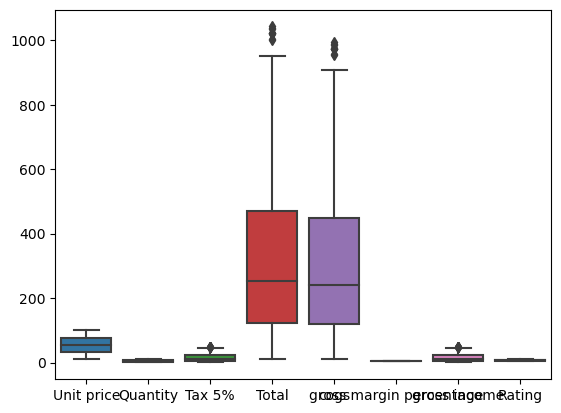

In [6]:

sns.boxplot(data=d)
plt.show()

REMOVE OUTLAYERS USING FOR LOOP

In [7]:
for x in d.index:
    if d.loc[x,"Total"]>1000:
     d.loc[x,"Total"]=900
print(d.head())
for x in d.index:
    if d.loc[x,"cogs"]>900:
     d.loc[x,"cogs"]=800
print(d.head())



    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

AFTER REMOVING OUTLAYERS

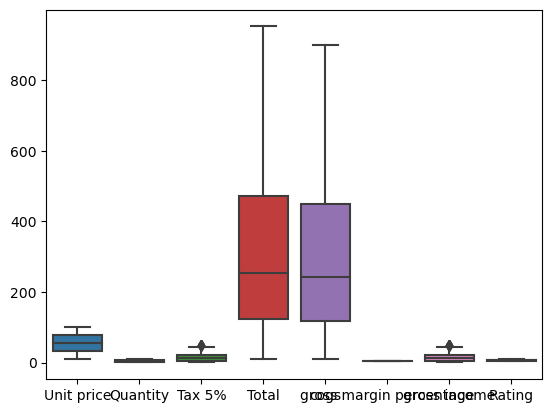

In [8]:
sns.boxplot(data=d)
plt.show()

DESCRIBE THE DATA 

In [9]:
df=pd.DataFrame(d)
print(df.describe())

        Unit price     Quantity       Tax 5%        Total         cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   321.855309   305.803080   
std      26.494628     2.923431    11.708825   242.972031   229.733531   
min      10.080000     1.000000     0.508500    10.678500    10.170000   
25%      32.875000     3.000000     5.924875   124.422375   118.497500   
50%      55.230000     5.000000    12.088000   253.848000   241.760000   
75%      77.935000     8.000000    22.445250   471.350250   448.905000   
max      99.960000    10.000000    49.650000   951.825000   899.640000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.

CORRELATION 

0.010777564342497293


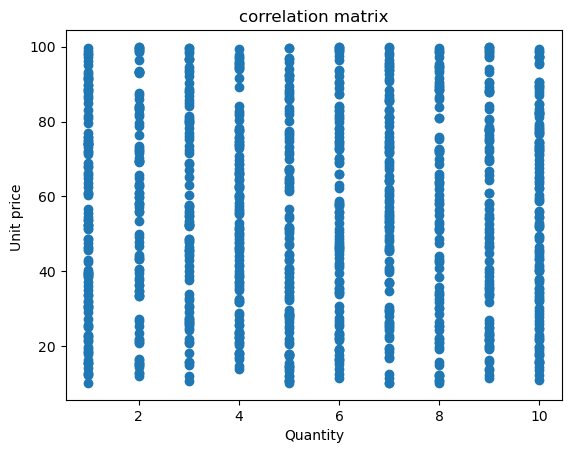

In [10]:

c=d['Quantity'].corr(d['Unit price'])
print(c)
plt.scatter(d['Quantity'],d['Unit price'])
plt.title("correlation matrix")
plt.xlabel('Quantity')
plt.ylabel('Unit price ')
plt.show()

HEATMAP CORRELATION

C:\Users\jayak\AppData\Local\Temp\ipykernel_3756\1879339639.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=d.corr()


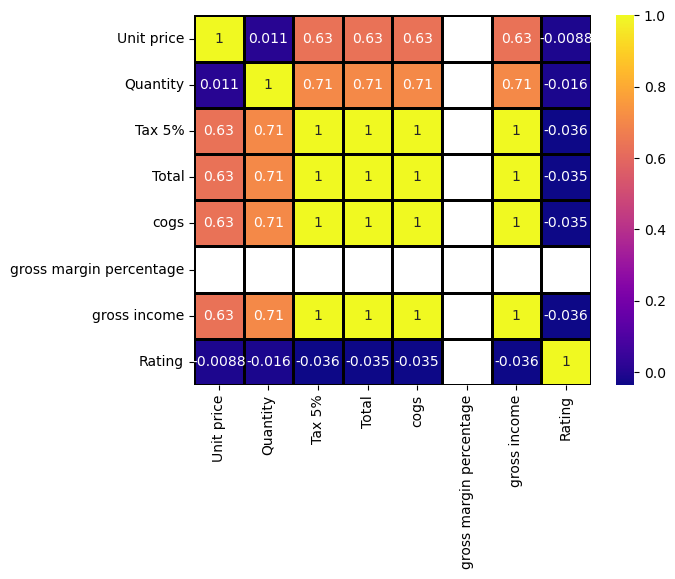

In [11]:
cr=d.corr()
sns.heatmap(cr, annot=True, cmap='plasma', linecolor='black', linewidths=1)
plt.show()



RENAME COLUMNS

In [12]:
rename=d.rename(columns={"Invoice ID":"Invoice_ID","Customer type":"Customer_type","Product line":"Product_line","Unit price":"Unit_price","gross margin percentage":"gross_margin_percentage","gross income":"gross_income","Total":"Total_revenue"},inplace=True)

PRINT INFORMATION AFTER RENAME

In [13]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product_line             1000 non-null   object        
 6   Unit_price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total_revenue            1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

1.SALES AND REVENUE ANALYSIS

calculate the mean value of total revenue by city?

City
Mandalay     319.134931
Naypyitaw    334.882413
Yangon       311.944354
Name: Total_revenue, dtype: float64


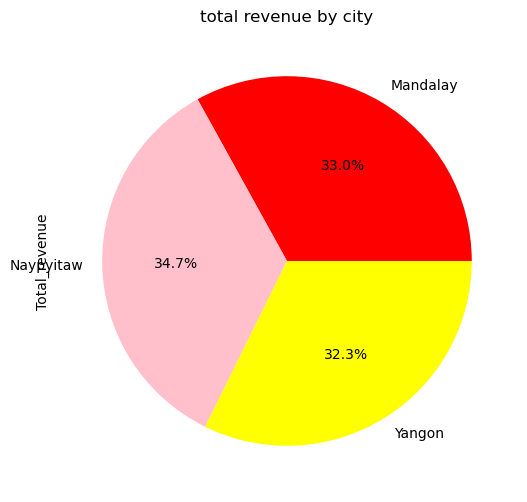

In [14]:

gr=d.groupby("City")
revenue=(gr["Total_revenue"].agg(np.mean))
print(revenue)
colors=['red','pink','yellow']
revenue.plot.pie(autopct="%1.1f%%",colors=colors,figsize=(6,6))
plt.title("total revenue by city")
plt.show()


which are  the rows where  unit price  is greater than 50?

In [15]:

fi=df[df["Unit_price"]> 50]
print(d.head())

    Invoice_ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product_line  Unit_price  Quantity   Tax 5%  Total_revenue  \
0       Health and beauty       74.69         7  26.1415       548.9715   
1  Electronic accessories       15.28         5   3.8200        80.2200   
2      Home and lifestyle       46.33         7  16.2155       340.5255   
3       Health and beauty       58.22         8  23.2880       489.0480   
4       Sports and travel       86.31         7  30.2085       634.3785   

        Date   Time      Payment    cogs  gross_margin_percentage  \
0 2019-01-05  13:08      Ewallet  522.83                 4.761905   
1 2019-03-08  10:29         Cash   76.40                 4.761

what are the details  where the quantity is 7?

In [16]:


'''g=d.groupby('Quantity')
print(g.get_group(7))'''

data=d[d["Quantity"]==7]
print(d.head())



    Invoice_ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product_line  Unit_price  Quantity   Tax 5%  Total_revenue  \
0       Health and beauty       74.69         7  26.1415       548.9715   
1  Electronic accessories       15.28         5   3.8200        80.2200   
2      Home and lifestyle       46.33         7  16.2155       340.5255   
3       Health and beauty       58.22         8  23.2880       489.0480   
4       Sports and travel       86.31         7  30.2085       634.3785   

        Date   Time      Payment    cogs  gross_margin_percentage  \
0 2019-01-05  13:08      Ewallet  522.83                 4.761905   
1 2019-03-08  10:29         Cash   76.40                 4.761

what is the size of whole data on gender?

In [17]:
g=d.groupby('Gender')
print(g.agg(np.size))

c=d.groupby('Gender').size()
print(c)


        Invoice_ID  Branch  City  Customer_type  Product_line  Unit_price  \
Gender                                                                      
Female         501     501   501            501           501         501   
Male           499     499   499            499           499         499   

        Quantity  Tax 5%  Total_revenue  Date  Time  Payment  cogs  \
Gender                                                               
Female       501     501            501   501   501      501   501   
Male         499     499            499   499   499      499   499   

        gross_margin_percentage  gross_income  Rating  
Gender                                                 
Female                      501           501     501  
Male                        499           499     499  
Gender
Female    501
Male      499
dtype: int64


what is the total revenue generated by each branch?

Branch
A    106061.0805
B    105952.7970
C    109841.4315
Name: Total_revenue, dtype: float64


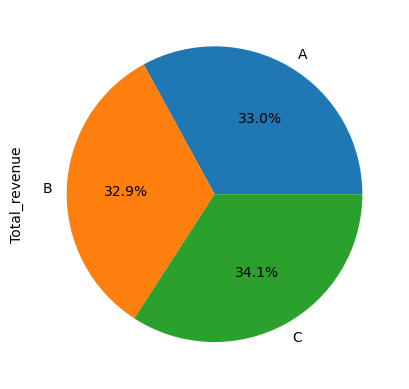

In [18]:
total__re=d.groupby("Branch")["Total_revenue"].sum()
print(total__re)
labels=["A","B","C"]
total__re.plot.pie(autopct="%1.1f%%")
plt.show()

which product line generates the highest gross income?

Product_line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross_income, dtype: float64
Food and beverages
2673.564


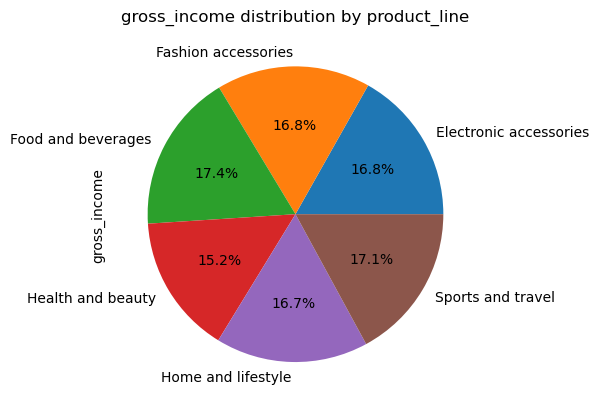

In [19]:
pl=d.groupby('Product_line')['gross_income'].sum()
print(pl)
highest_revenue_product_line=pl.idxmax()
highest_revenue=pl.max()
print(highest_revenue_product_line)
print(highest_revenue)
pl.plot.pie(autopct='%1.1f%%',title="gross_income distribution by product_line")
plt.show()

what is the average gross income per invoice id of first 10 rows?

Invoice_ID
101-17-6199    16.0265
101-81-4070     6.2820
102-06-2002     6.3125
102-77-2261    22.8585
105-10-6182     2.1480
105-31-1824    24.3320
106-35-6779     4.4340
109-28-2512    29.2830
109-86-4363    21.0280
110-05-6330    11.8290
Name: gross_income, dtype: float64


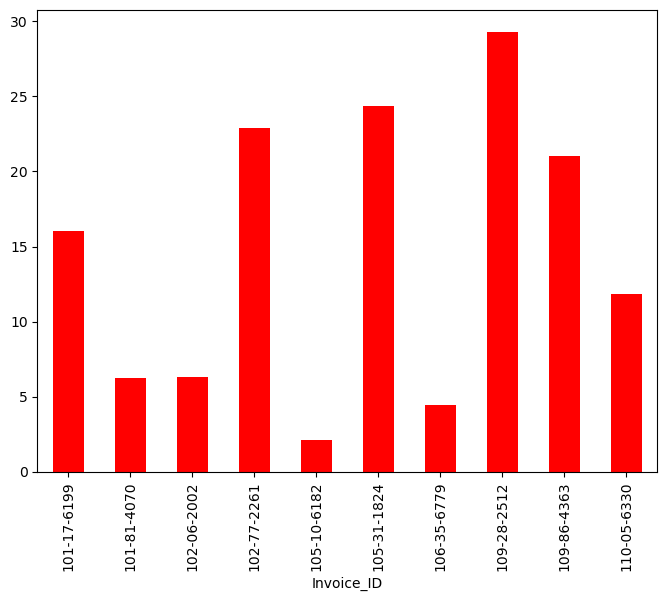

In [20]:

average_gross_income=d.groupby('Invoice_ID')['gross_income'].mean()
print(average_gross_income.head(10))
plot_data=average_gross_income.head(10)
plt.figure(figsize=(8,6))
plot_data.plot(x="Invoice_ID",y="gross_income",kind="bar",color="red")
plt.xticks(rotation=90)
plt.show()


what is the total cost of goods sold (COGS)across different branches?

Branch
A    100846.91
B    100793.14
C    104163.03
Name: cogs, dtype: float64


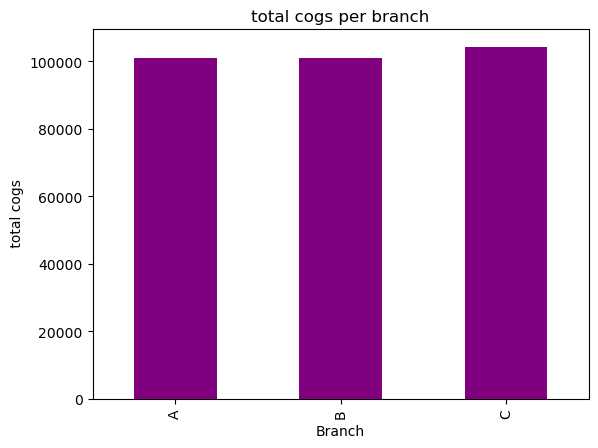

In [21]:
total_cogs_per_branch=d.groupby('Branch')['cogs'].sum()
print(total_cogs_per_branch)
total_cogs_per_branch.plot(kind='bar',color='purple')
plt.title('total cogs per branch')
plt.xlabel('Branch')
plt.ylabel(' total cogs')
plt.show()


2.CUSTOMER AND DEMOGRAHICS ANALYSIS

which customer type contributes the most to total revenue?

total_revenue= Member:163825.62900000002,Normal:158029.68

 the customer type contributing the most to  total_revenue is'Member
'which total sales of 163825.62900000002. 


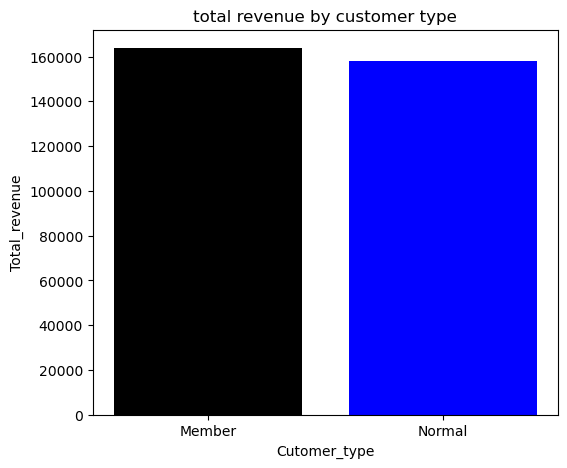

In [22]:
df=pd.DataFrame(d)
member=df.loc[df['Customer_type']=='Member','Total_revenue'].sum()
normal=df.loc[df['Customer_type']=='Normal','Total_revenue'].sum()
if member>normal:
    top_customer_type="Member"
    top_revenue=member 

else:
    top_customer_type="Normal"
    top_revenue=normal
print(f"total_revenue= Member:{member},Normal:{normal}")
print(f"\n the customer type contributing the most to  total_revenue is'{top_customer_type}\n'which total sales of {top_revenue}. ")
plt.figure(figsize=(6,5))
plt.bar(["Member","Normal"],[member,normal],color=["black","blue"])
plt.xlabel("Cutomer_type")
plt.ylabel("Total_revenue")
plt.title("total revenue by customer type")
plt.show()
 



what is the average unit price of products purchased by male and female customers?

Gender
Female    55.263952
Male      56.081944
Name: Unit_price, dtype: float64


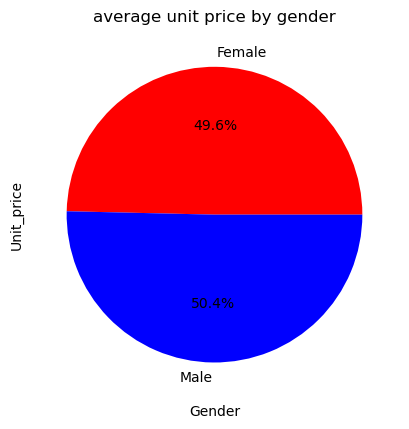

In [23]:
d=pd.DataFrame(df)
average=d.groupby('Gender')['Unit_price'].mean()
print(average)
colors=['red','blue']
average.plot.pie(autopct='%1.1f%%',title='average unit price by gender',colors=colors)
plt.xlabel('Gender')
plt.ylabel('Unit_price')
plt.show()

3.PRODUCT PERFORMANCE


what is the best selling product line based on quantity sold ?

best_selling product line:Electronic accessories with 971 units sold.


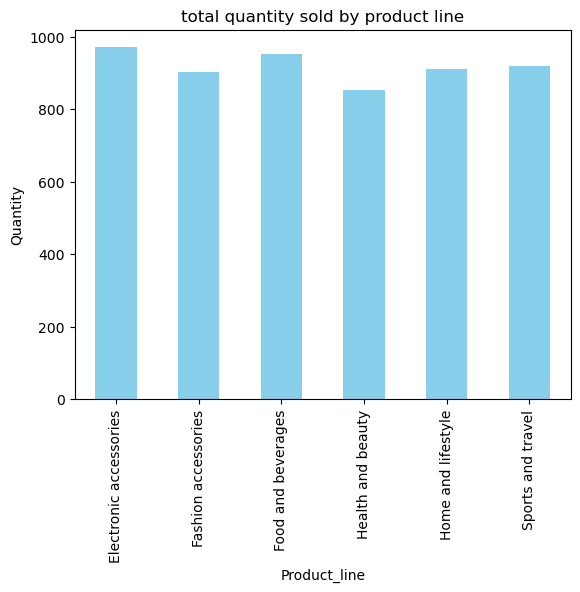

In [24]:
best_selling=df.groupby('Product_line')['Quantity'].sum()
best_selling_product=best_selling.idxmax()
best_selling_quantity=best_selling.max()
print(f"best_selling product line:{best_selling_product} with {best_selling_quantity} units sold.")
best_selling.plot(kind='bar',color='skyblue')
plt.title("total quantity sold by product line")
plt.xlabel('Product_line')
plt.ylabel('Quantity')
plt.show()


which product line has the highest profit margin?

Invoice_ID                         325-77-6186
Branch                                       A
City                                    Yangon
Customer_type                           Member
Gender                                  Female
Product_line                Home and lifestyle
Unit_price                               90.65
Quantity                                    10
Tax 5%                                  45.325
Total_revenue                          951.825
Date                       2019-03-08 00:00:00
Time                                     10:53
Payment                                Ewallet
cogs                                     800.0
gross_margin_percentage               4.761905
gross_income                            45.325
Rating                                     7.3
profit                                 151.825
Profit Margin                        15.950936
Name: 429, dtype: object


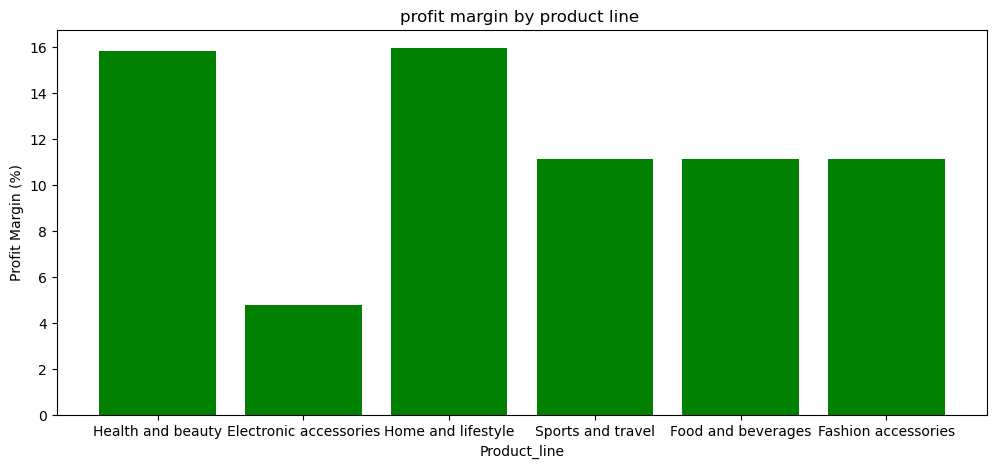

In [25]:
#calculate profit for each product line
df['profit']=df['Total_revenue'] - df['cogs']
#calculate profit margin for each product line
df['Profit Margin']=(df['profit'] / df['Total_revenue'])*100
#find the product line with the highest profit margin
highest_margin=df.loc[df['Profit Margin'] .idxmax()]
print(highest_margin)
#plotting the profit margins
plt.figure(figsize=(12,5))
plt.bar(df['Product_line'],df['Profit Margin'],color="green")
plt.title('profit margin by product line ')
plt.xlabel('Product_line')
plt.ylabel('Profit Margin (%)')
plt.show()




Are there seasonal trends in product sales based on the date ?

   year  month  total_sales
0  2019      1    110754.16
1  2019      2     92589.88
2  2019      3    104243.34


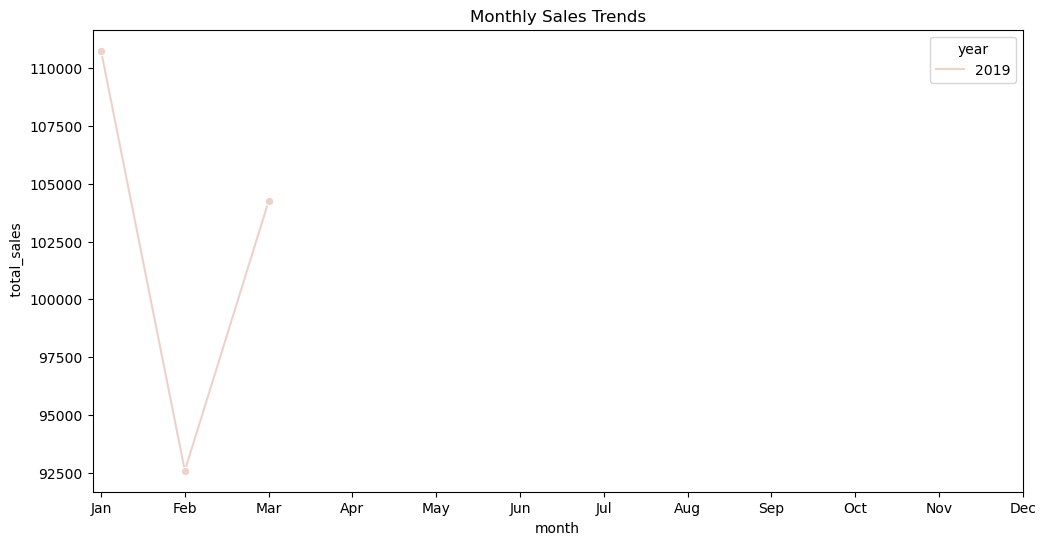

In [26]:
#CONVERT DATES AND AGGREGATE SALES
#convert the date column to datetime format
#df ['date']=pd.to_datetime(df['date])
#extract year and month
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['total_sales']=df['Unit_price'] * df['Quantity']
#aggregate sales by month
monthly_sales=df.groupby(["year","month"]) ["total_sales"].sum().reset_index()
print(monthly_sales)
# Plot the monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="total_sales", hue="year", data=monthly_sales, marker="o")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Sales Trends")
plt.xlabel("month")
plt.ylabel(" total_sales")
plt.legend(title="year")
plt.show()



4.TIME_BASED ANALYSIS

What time of the day has the highest sales?(morning.afternoon,evening)

  time_of_day  total_sales
0     Evening    307587.38


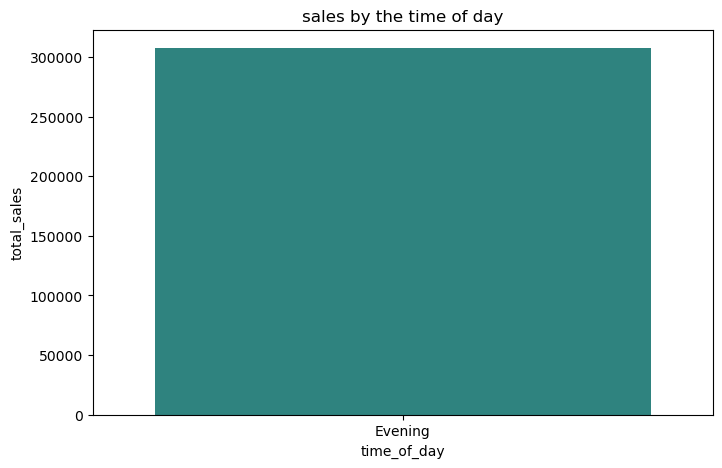

In [27]:
#EXTRACT TIME AND CATEGORIZE
#extract the hour from the datetime column
df['hour']= df['Date'].dt.hour
#categorize time of the day into morning, afternoon, evening
def categorize_time_of_day(hour):
    if 6 <= hour <12:
        return "Morning"
    elif 12 <= hour <18:
        return "Afternoon"
    else:
        return "Evening"
df["time_of_day"]=df["hour"].apply(categorize_time_of_day)
#CALCULATES SALES BY TIME OF DAY
df['total_sales']=df['Unit_price'] * df['Quantity']
#aggregate totalsales by time of day
sales_by_time=df.groupby("time_of_day")["total_sales"].sum().reset_index()
print(sales_by_time)
#plot the sales by time  of day
plt.figure(figsize=(8,5))
sns.barplot(x='time_of_day',y='total_sales',data=sales_by_time,palette="viridis")
plt.title('sales by the time of day')
plt.xlabel("time_of_day")
plt.ylabel("total_sales")
plt.show()



5.PAYEMENT & TRANSACTIONS

which payment method is the most popular ammong customers using heatmap?

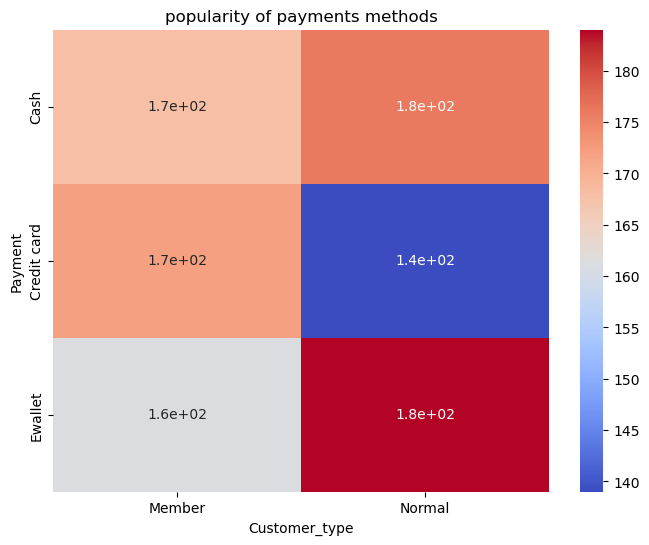

In [28]:
df=pd.DataFrame(d)
pivot_data=df.pivot_table(index='Payment',columns='Customer_type',values='Invoice_ID',aggfunc='count')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_data,annot=True,cmap='coolwarm')
plt.title('popularity of payments methods')
plt.xlabel('Customer_type')
plt.ylabel('Payment')
plt.show()

SUMMARY


A heatmap visualizes payment method distribution among customer types (Member vs. Normal).Cash, Credit Card, and E-wallets are analyzed based on usage frequency.A bar chart compares COGS for three branches (A, B, and C), showing relatively similar values.A pie chart displays how different product lines contribute to gross income.Categories include Fashion Accessories, Electronic Accessories, Food & Beverages, etc.A bar chart compares revenue generated by Members vs. Normal customers.Members contribute slightly more revenue than Normal customers.Overall, the project analyzes customer behavior, payment methods, product performance, and revenue distribution.

SUGGESTIONS


1.Reducing the cost of goods sold directly increases the gross profit. By negotiating lower prices or finding more cost-effective suppliers, you can reduce the per-unit cost of your products, thus improving the profitability of each sale.

2.Efficient inventory management ensures that you are not overstocking or understocking products, which can lead to wastage, stockouts, and missed sales opportunities. By optimizing inventory levels across all branches, you can reduce excess inventory costs, lower storage costs, and avoid lost sales due to out-of-stock products.

3.By identifying and rewarding the customer type that contributes the most to revenue (e.g., Regular or VIP customers), you can increase customer retention, drive repeat purchases, and enhance customer satisfaction. Offering personalized rewards can incentivize customers to spend more and stay loyal.

4.Promotions such as discounts, limited-time offers, or bundled deals can create urgency and drive customers to purchase more of the underperforming product lines. By analyzing your sales data (like what you've done for best-selling products), you can focus these efforts on products that need a sales boost.

5.Understanding when sales peak during the year allows you to better prepare for those high-demand periods. By aligning your inventory levels and marketing efforts with the seasons, you can maximize revenue and ensure that you have enough stock for peak periods while avoiding overstocking during slower months.